In [ ]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
from helpers import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 5

In [2]:
samplerate, data = wavfile.read('F2_tone_be=21_01.wav')
print(data)

[-544 -397 -778 ...  997  968  861]


/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_55094/3435766774.py:1: WavFileWarning: Reached EOF prematurely; finished at 32940 bytes, expected 65800 bytes from header.
  samplerate, data = wavfile.read('F2_tone_be=21_01.wav')


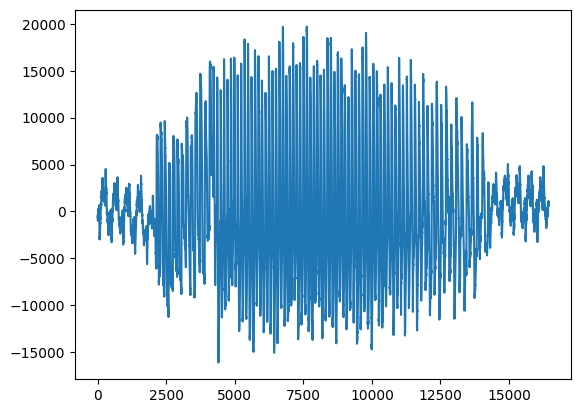

In [3]:
plt.plot(data)
plt.show()

In [4]:
for i, row in all_data.iterrows():
    if row.filename == "F1_bi_33_02":
        savedRow = row
        # break

In [ ]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_55094/4099673194.py:1: WavFileWarning: Reached EOF prematurely; finished at 51184 bytes, expected 102288 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


<function matplotlib.pyplot.show(close=None, block=None)>

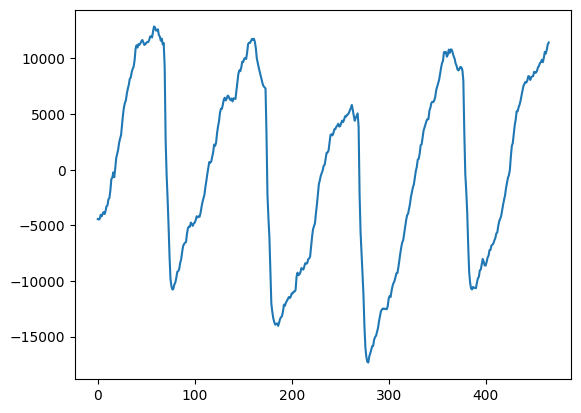

In [6]:
egg = data[startSample:endSample]
plt.plot(egg - np.mean(egg))
plt.show

In [7]:
from scipy.signal import find_peaks
peaks, hello = find_peaks(egg, distance = int(0.7 * samplerate / savedRow.strF0))
peaks

array([ 58, 161, 262, 364, 461])

<function matplotlib.pyplot.show(close=None, block=None)>

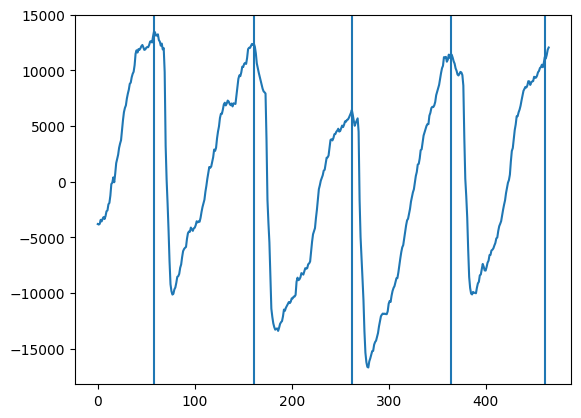

In [8]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.show

In [9]:
# between the second and third peak, find the min and max:

temp_thing_blah = egg[peaks[1]:peaks[2]]
max_thing = np.max(temp_thing_blah)
min_thing = np.min(temp_thing_blah)

threshold = min_thing + ((max_thing - min_thing) / 4)

In [10]:
rounded_off = egg[peaks[0]:endSample]
above_thresh = set(np.argwhere(rounded_off >= threshold).flatten())

crosses = []
for i in range(1, len(rounded_off)):
    if (i - 1 in above_thresh) != (i in above_thresh):
        crosses.append(i)

crosses

# plt.plot(clipped_egg)
# for peak in crosses:
#     plt.axvline(peak)
# plt.axhline(threshold)
# plt.show

[16, 29, 120, 162, 215, 254, 325, 346]

In [11]:
clipped_egg = rounded_off[crosses[0]:crosses[4]]

### Next up: normalize to 0-1, linear interpolate to 1,000 samples, profit

In [12]:
normalized_egg = (clipped_egg - np.min(clipped_egg)) / (np.max(clipped_egg) - np.min(clipped_egg))

# plt.plot(normalized)
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

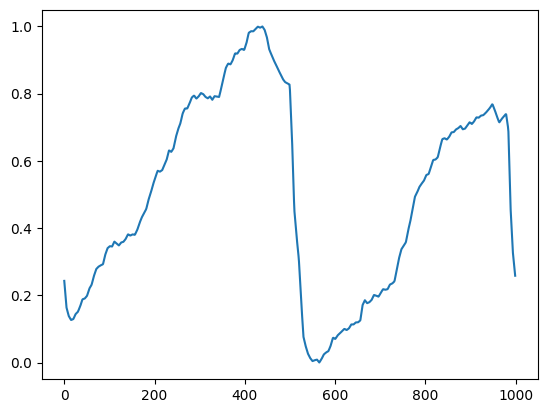

In [13]:
original_length = len(normalized_egg)
xp = np.arange(original_length)
x = np.linspace(0, original_length - 1, num=1000)
interpolated_egg = np.interp(x, xp, normalized_egg)

plt.plot(interpolated_egg)
plt.show